LPSU replacement policy completes 998 requests per second and each request
 completed in 7.7404352393290194 seconds


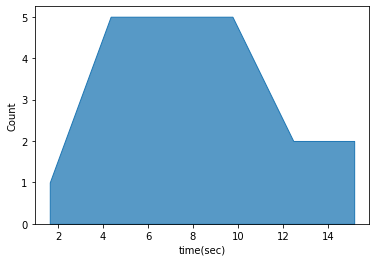


Please close the window to simulate next policy

LFU replacement policy completes 993 requests per second and each request
 completed in 9.644001966310586 seconds


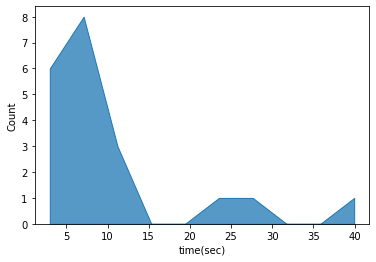


Please close the window to simulate next policy

LRU replacement policy completes 989 requests per second and each request
 completed in 8.752439204519998 seconds


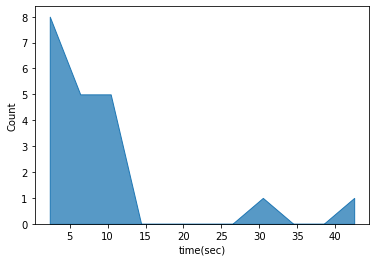


Please close the window to simulate next policy


EXPLANATION:
 least probabilistically and size based - LPSU that used file-probability*file-size as a score, 
 much like least frequently used - LFU
 and then least recently used - LRU frees file that least used in recent times


In [4]:
# Dependencies
from numpy import average
from seaborn import histplot
from matplotlib.pyplot import show
# files
from cache_system import *
from cache_simulator import *
from files import *
from request_events import *
from request_queue import *

for cache_policy in [LPSU,LFU,LRU]:
    completed_requests = list()
    requests = list()
    for iteration in range(20):
        entire_files = Files()
        cache = cache_policy(entire_files)
        main = Cache_Simulator(entire_files,cache)
        for time in range(10):
            New_Request(main,time,None,'Generate Requests')
        while(len(main.request_queue.queued)):
            request = main.request_queue.pop()
            request.execute()    
        completed_requests.append(average(main.get_all_requests()))
        requests.append(main.number_of_requests)
    print(cache.__class__.__name__ + " replacement policy completes " + str(int(average(requests))) + " requests per second " + "and each request\n completed in "
          + str(average(completed_requests)) + " seconds")
    p = histplot(data=completed_requests,element="poly")
    p.set_xlabel('time(sec)')
    show()
    print('\n'+"Please close the window to simulate next policy\n")
    
    

print("\nEXPLANATION:\n least probabilistically and size based - LPSU that used file-probability*file-size as a score, \n much like least frequently used - LFU\n and then least recently used - LRU frees file that least used in recent times")




